In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now we import the required datasets.

In [2]:
water_df = pd.read_csv('water_quality_potability.csv')

In [3]:
water_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Now we see what is the distribution of drinkable water and non-drinkable water.

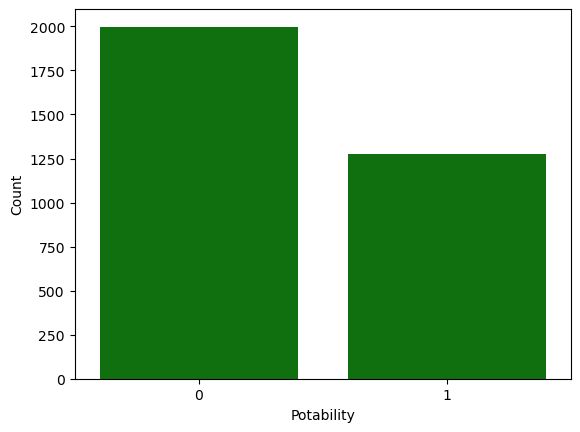

In [30]:
sns.countplot(x='Potability', data=water_df, color='green')
plt.xlabel('Drinkable or Not Drinkable')
plt.xlabel('Potability')
plt.ylabel('Count')
plt.show()

In order to make sure our SVC algorithm works fine, we check for all the possible missing values.

In [6]:
#Checking for missing values
water_df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

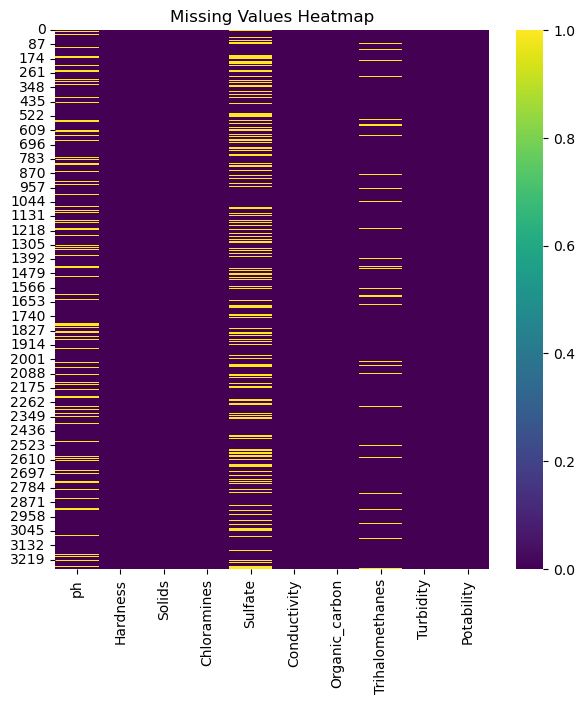

In [7]:
plt.figure(figsize=(7, 7))
sns.heatmap(data=water_df.isnull(), cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

We check and perform data analysis for each of the columns of the data.

In [8]:
water_df['ph'].describe()

count    2785.000000
mean        7.080795
std         1.594320
min         0.000000
25%         6.093092
50%         7.036752
75%         8.062066
max        14.000000
Name: ph, dtype: float64

In [9]:
water_df['Sulfate'].describe()

count    2495.000000
mean      333.775777
std        41.416840
min       129.000000
25%       307.699498
50%       333.073546
75%       359.950170
max       481.030642
Name: Sulfate, dtype: float64

In [10]:
water_df['Trihalomethanes'].describe()

count    3114.000000
mean       66.396293
std        16.175008
min         0.738000
25%        55.844536
50%        66.622485
75%        77.337473
max       124.000000
Name: Trihalomethanes, dtype: float64

We now use Simple Imputer to fill the missing values. We couldn't use KNN Imputer because there were negative values as well, and Simple Imputer was much better in handling those values.

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
water_df[['Trihalomethanes']] = imputer.fit_transform(water_df[['Trihalomethanes']])
water_df[['Sulfate']] = imputer.fit_transform(water_df[['Sulfate']])
water_df[['ph']] = imputer.fit_transform(water_df[['ph']])

Now we will plot the heatmap and we will see there are no more missing values in our dataset.

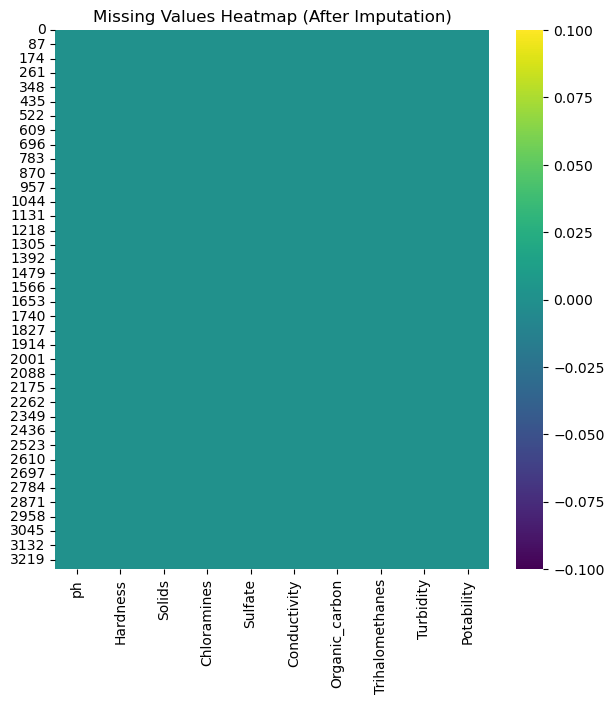

In [13]:
plt.figure(figsize=(7, 7))
sns.heatmap(data=water_df.isnull(), cmap='viridis')
plt.title('Missing Values Heatmap (After Imputation)')
plt.show()

Thus now our dataset is clean. Now this dataset is ready to be worked up by using our models.

In [14]:
water_df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


We will see distribution of each of the features by plotting graphs for each and every one of these features.

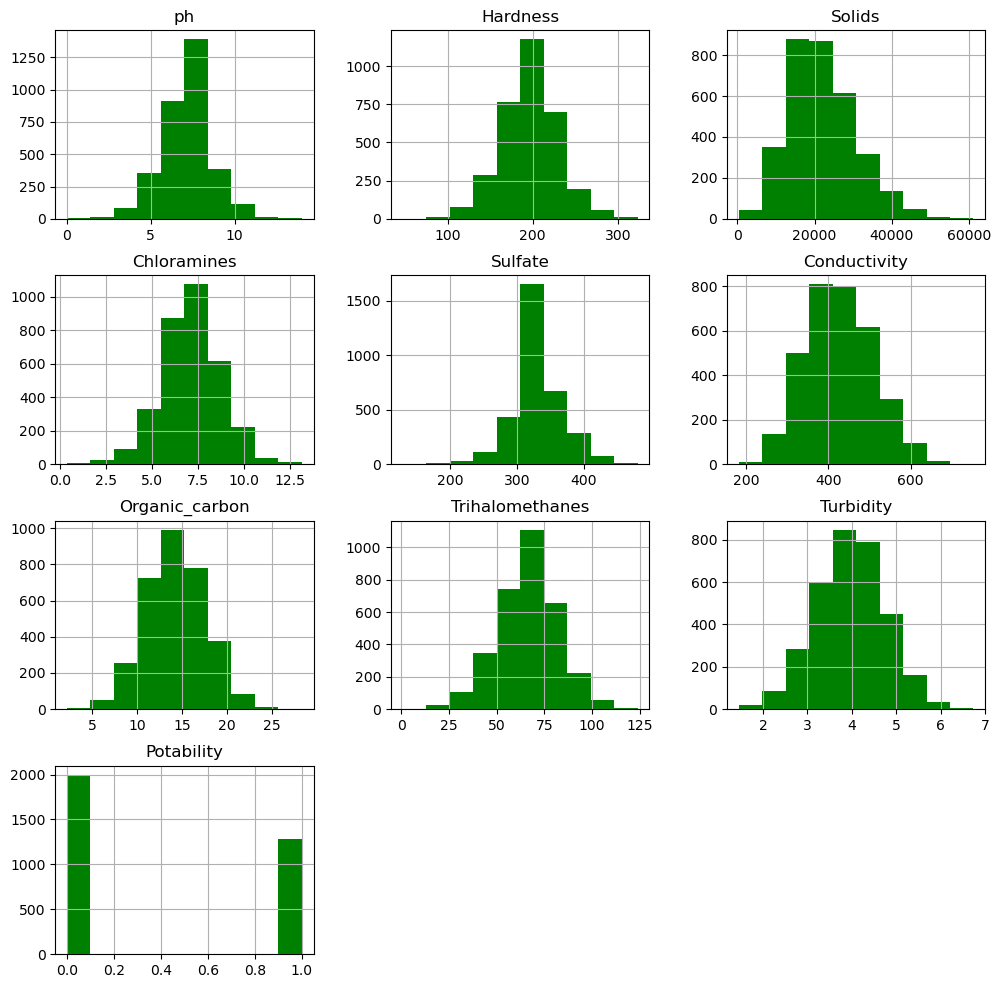

In [18]:
water_df.hist(figsize=(12, 12), color = 'green')
plt.show()

From here, we start our training and building of our model.

In [19]:
X = water_df.drop(['Potability'], axis=1)
y = water_df['Potability']

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

SVC()

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Score: ", svm_model.score(X_test_scaled, y_test))
print("")

Score:  0.6959706959706959



This is the maximum accuracy by any other mode, and this code gives the best prediction in this dataset. There might be possibility the dataset is small, or the dataset is clumsy that's why the accuracy is less. With more data the model is sure to perform well.

In [25]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(SVC(), X_train_scaled, y_train, cv=3)

In [31]:
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

Confusion Matrix:
[[1376  112]
 [ 691  278]]


Finally we finish by plotting the confusion matrix for this model.